In [29]:
import tfrbm

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tfrbm import BBRBM, GBRBM
import tensorflow as tf
from tensorflow import keras
import numpy as np
import mnist
import random
random.seed(20)
images = mnist.train_images()
labels = mnist.train_labels()
images = np.reshape(images,(60000,784))

test_images = mnist.test_images()
test_labels = mnist.test_labels()
test_images = np.reshape(test_images,(10000,784))

In [31]:
#generate 10k random integers between 0,60000
d_indices = random.sample(range(0,60000),10000)

In [32]:
tr_images = images[d_indices,:]

In [33]:
tr_labels = labels[d_indices]

In [34]:
random.seed(40)
val_indices = random.sample(range(0,60000),1000)
val_img = images[val_indices,:]
val_lab = labels[val_indices]

In [35]:
# from pca_for_large_dimension import pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA
pca = PCA(25)
pca.fit(tr_images)
red_data = pca.transform(tr_images)
val_img = pca.transform(val_img)
test_images = pca.transform(test_images)

In [36]:
val_img.shape

(1000, 25)

In [42]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
input_shape=(25,)
num_classes = 10
model = keras.Sequential()
model.add(Dense(256, activation="sigmoid",input_shape=input_shape))
# model.add(Dropout(0.2))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001),
              metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               6656      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 75,018
Trainable params: 75,018
Non-trainable params: 0
_________________________________________________________________


In [50]:
training=model.fit(red_data,tr_labels,batch_size=40,
          epochs=30,
          validation_data=(val_img,val_lab))

Train on 10000 samples, validate on 1000 samples
Epoch 1/30
10000/10000 [==============================] - 0s 44us/step - loss: 0.3029 - acc: 0.9159 - val_loss: 0.3224 - val_acc: 0.9140
Epoch 2/30
10000/10000 [==============================] - 0s 44us/step - loss: 0.2960 - acc: 0.9176 - val_loss: 0.3194 - val_acc: 0.9160
Epoch 3/30
10000/10000 [==============================] - 0s 45us/step - loss: 0.2904 - acc: 0.9188 - val_loss: 0.3143 - val_acc: 0.9210
Epoch 4/30
10000/10000 [==============================] - 0s 44us/step - loss: 0.2848 - acc: 0.9188 - val_loss: 0.3098 - val_acc: 0.9190
Epoch 5/30
10000/10000 [==============================] - 0s 44us/step - loss: 0.2793 - acc: 0.9229 - val_loss: 0.3087 - val_acc: 0.9200
Epoch 6/30
10000/10000 [==============================] - 0s 45us/step - loss: 0.2741 - acc: 0.9242 - val_loss: 0.3084 - val_acc: 0.9190
Epoch 7/30
10000/10000 [==============================] - 0s 45us/step - loss: 0.2698 - acc: 0.9252 - val_loss: 0.3014 - val_acc:

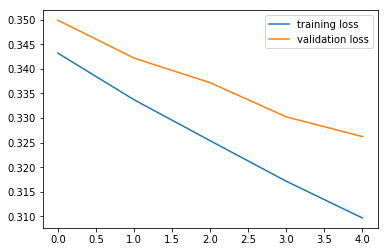

In [48]:
plt.plot(training.history['loss'],label="training loss")
plt.plot(training.history['val_loss'],label="validation loss")
plt.legend()
plt.show()

In [51]:
loss,acc = model.evaluate(test_images,test_labels)
print("accuracy is",acc)

10000/10000 [==============================] - 0s 19us/step
accuracy is 0.9067


### now using LDA

In [52]:
red_data = pca.fit(tr_images).transform(tr_images)
lda = LinearDiscriminantAnalysis(n_components=10)
lda = lda.fit(red_data,tr_labels)
red_data2 = lda.transform(red_data)
lda_val_data = lda.transform(val_img)
lda_test_data = lda.transform(test_images)

In [53]:
print(red_data2.shape)

(10000, 9)


In [56]:
input_shape=(9,)
num_classes = 10
model_on_lda = keras.Sequential()
model_on_lda.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_on_lda.add(Dropout(0.2))
model_on_lda.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_on_lda.add(Dense(num_classes, activation='softmax'))

model_on_lda.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [57]:
lda_train=model_on_lda.fit(red_data2,tr_labels,batch_size=20,
          epochs=20,validation_data=(lda_val_data,val_lab))

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 119us/step - loss: 1.0496 - acc: 0.7015 - val_loss: 0.4804 - val_acc: 0.8730
Epoch 2/20
10000/10000 [==============================] - 1s 86us/step - loss: 0.5371 - acc: 0.8359 - val_loss: 0.4307 - val_acc: 0.8770
Epoch 3/20
10000/10000 [==============================] - 1s 84us/step - loss: 0.5027 - acc: 0.8471 - val_loss: 0.4570 - val_acc: 0.8640
Epoch 4/20
10000/10000 [==============================] - 1s 87us/step - loss: 0.4839 - acc: 0.8498 - val_loss: 0.4119 - val_acc: 0.8690
Epoch 5/20
10000/10000 [==============================] - 1s 84us/step - loss: 0.4622 - acc: 0.8541 - val_loss: 0.3974 - val_acc: 0.8880
Epoch 6/20
10000/10000 [==============================] - 1s 85us/step - loss: 0.4481 - acc: 0.8610 - val_loss: 0.3874 - val_acc: 0.8840
Epoch 7/20
10000/10000 [==============================] - 1s 94us/step - loss: 0.4322 - acc: 0.8648 - val_loss: 0.3794 - val_acc

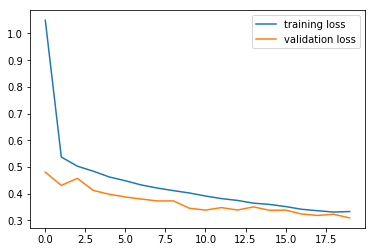

In [58]:
plt.plot(lda_train.history['loss'],label="training loss")
plt.plot(lda_train.history['val_loss'],label="validation loss")
plt.legend()
plt.show()

In [59]:
loss,acc = model_on_lda.evaluate(lda_test_data,test_labels)
print(acc)

10000/10000 [==============================] - 0s 21us/step
0.8993


## 3_part_c...using gaussian RBM


In [60]:
from tfrbm import BBRBM, GBRBM
print(red_data.shape)

(10000, 25)


Epoch: 0: 100%|##########| 1000/1000 [00:01<00:00, 857.22it/s]
Train error: 73126.3107

Epoch: 1: 100%|##########| 1000/1000 [00:01<00:00, 896.22it/s]
Train error: 60782.2626

Epoch: 2: 100%|##########| 1000/1000 [00:01<00:00, 913.32it/s]
Train error: 57789.5558

Epoch: 3: 100%|##########| 1000/1000 [00:01<00:00, 907.59it/s]
Train error: 56146.3069

Epoch: 4: 100%|##########| 1000/1000 [00:01<00:00, 869.16it/s]
Train error: 54920.3405

Epoch: 5: 100%|##########| 1000/1000 [00:01<00:00, 885.86it/s]
Train error: 54061.3008

Epoch: 6: 100%|##########| 1000/1000 [00:01<00:00, 899.68it/s]
Train error: 53473.6006

Epoch: 7: 100%|##########| 1000/1000 [00:01<00:00, 924.99it/s]
Train error: 53069.8201

Epoch: 8: 100%|##########| 1000/1000 [00:01<00:00, 910.39it/s]
Train error: 52773.0304

Epoch: 9: 100%|##########| 1000/1000 [00:01<00:00, 977.82it/s]
Train error: 52546.3610

Epoch: 10: 100%|##########| 1000/1000 [00:01<00:00, 954.03it/s]
Train error: 52359.2069

Epoch: 11: 100%|##########| 100

Epoch: 92: 100%|##########| 1000/1000 [00:01<00:00, 914.86it/s]
Train error: 50637.6569

Epoch: 93: 100%|##########| 1000/1000 [00:01<00:00, 880.86it/s]
Train error: 50634.7681

Epoch: 94: 100%|##########| 1000/1000 [00:01<00:00, 869.59it/s]
Train error: 50621.1525

Epoch: 95: 100%|##########| 1000/1000 [00:01<00:00, 889.52it/s]
Train error: 50630.2748

Epoch: 96: 100%|##########| 1000/1000 [00:01<00:00, 901.53it/s]
Train error: 50624.4656

Epoch: 97: 100%|##########| 1000/1000 [00:01<00:00, 891.97it/s]
Train error: 50618.5784

Epoch: 98: 100%|##########| 1000/1000 [00:01<00:00, 881.60it/s]
Train error: 50615.7141

Epoch: 99: 100%|##########| 1000/1000 [00:01<00:00, 885.07it/s]
Train error: 50607.3074

Epoch: 100: 100%|##########| 1000/1000 [00:01<00:00, 920.98it/s]
Train error: 50610.1278

Epoch: 101: 100%|##########| 1000/1000 [00:01<00:00, 906.21it/s]
Train error: 50601.5292

Epoch: 102: 100%|##########| 1000/1000 [00:01<00:00, 911.10it/s]
Train error: 50595.0446

Epoch: 103: 100%|#

Epoch: 183: 100%|##########| 1000/1000 [00:01<00:00, 783.54it/s]
Train error: 50165.5431

Epoch: 184: 100%|##########| 1000/1000 [00:01<00:00, 928.99it/s]
Train error: 50159.7606

Epoch: 185: 100%|##########| 1000/1000 [00:01<00:00, 973.61it/s]
Train error: 50153.5935

Epoch: 186: 100%|##########| 1000/1000 [00:01<00:00, 954.26it/s]
Train error: 50150.5624

Epoch: 187: 100%|##########| 1000/1000 [00:01<00:00, 956.76it/s]
Train error: 50134.9849

Epoch: 188: 100%|##########| 1000/1000 [00:01<00:00, 986.07it/s]
Train error: 50136.2115

Epoch: 189: 100%|##########| 1000/1000 [00:01<00:00, 952.20it/s]
Train error: 50131.9921

Epoch: 190: 100%|##########| 1000/1000 [00:01<00:00, 947.48it/s]
Train error: 50123.1078

Epoch: 191: 100%|##########| 1000/1000 [00:01<00:00, 920.91it/s]
Train error: 50114.0724

Epoch: 192: 100%|##########| 1000/1000 [00:01<00:00, 948.99it/s]
Train error: 50114.2372

Epoch: 193: 100%|##########| 1000/1000 [00:01<00:00, 973.21it/s]
Train error: 50110.0735

Epoch: 194

Epoch: 274: 100%|##########| 1000/1000 [00:01<00:00, 940.93it/s]
Train error: 49790.1189

Epoch: 275: 100%|##########| 1000/1000 [00:01<00:00, 936.71it/s]
Train error: 49789.9514

Epoch: 276: 100%|##########| 1000/1000 [00:01<00:00, 908.09it/s]
Train error: 49780.7086

Epoch: 277: 100%|##########| 1000/1000 [00:01<00:00, 916.78it/s]
Train error: 49786.9202

Epoch: 278: 100%|##########| 1000/1000 [00:01<00:00, 870.51it/s]
Train error: 49776.6281

Epoch: 279: 100%|##########| 1000/1000 [00:01<00:00, 901.56it/s]
Train error: 49775.4741

Epoch: 280: 100%|##########| 1000/1000 [00:01<00:00, 929.46it/s]
Train error: 49779.6139

Epoch: 281: 100%|##########| 1000/1000 [00:01<00:00, 918.88it/s]
Train error: 49780.0812

Epoch: 282: 100%|##########| 1000/1000 [00:01<00:00, 924.44it/s]
Train error: 49782.4408

Epoch: 283: 100%|##########| 1000/1000 [00:01<00:00, 911.57it/s]
Train error: 49775.6704

Epoch: 284: 100%|##########| 1000/1000 [00:01<00:00, 938.85it/s]
Train error: 49778.3476

Epoch: 285

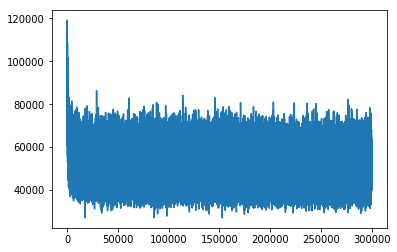

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tfrbm import GBRBM

gbrbm = GBRBM(n_visible=25, n_hidden=9, learning_rate=0.01, momentum=0.95, use_tqdm=True)
errs = gbrbm.fit(red_data, n_epoches=300, batch_size=10)
plt.plot(errs)
plt.show()

Epoch: 0: 100%|##########| 500/500 [00:00<00:00, 978.42it/s] 
Train error: 49964.8102

Epoch: 1: 100%|##########| 500/500 [00:00<00:00, 892.61it/s] 
Train error: 49941.1583

Epoch: 2: 100%|##########| 500/500 [00:00<00:00, 915.26it/s] 
Train error: 49952.3114

Epoch: 3: 100%|##########| 500/500 [00:00<00:00, 888.96it/s]
Train error: 49947.4010

Epoch: 4: 100%|##########| 500/500 [00:00<00:00, 903.88it/s]
Train error: 49946.6324

Epoch: 5: 100%|##########| 500/500 [00:00<00:00, 896.10it/s] 
Train error: 49950.0499

Epoch: 6: 100%|##########| 500/500 [00:00<00:00, 882.13it/s]
Train error: 49946.7229

Epoch: 7: 100%|##########| 500/500 [00:00<00:00, 897.24it/s]
Train error: 49936.7223

Epoch: 8: 100%|##########| 500/500 [00:00<00:00, 885.09it/s]
Train error: 49947.9158

Epoch: 9: 100%|##########| 500/500 [00:00<00:00, 949.04it/s] 
Train error: 49941.4816

Epoch: 10: 100%|##########| 500/500 [00:00<00:00, 890.99it/s] 
Train error: 49949.8646

Epoch: 11: 100%|##########| 500/500 [00:00<00:0

Epoch: 94: 100%|##########| 500/500 [00:00<00:00, 938.94it/s]
Train error: 49935.7176

Epoch: 95: 100%|##########| 500/500 [00:00<00:00, 908.35it/s]
Train error: 49944.5693

Epoch: 96: 100%|##########| 500/500 [00:00<00:00, 905.05it/s]
Train error: 49943.1749

Epoch: 97: 100%|##########| 500/500 [00:00<00:00, 913.24it/s] 
Train error: 49946.2923

Epoch: 98: 100%|##########| 500/500 [00:00<00:00, 906.25it/s]
Train error: 49933.3140

Epoch: 99: 100%|##########| 500/500 [00:00<00:00, 913.94it/s] 
Train error: 49942.2836

Epoch: 100: 100%|##########| 500/500 [00:00<00:00, 934.62it/s] 
Train error: 49937.9046

Epoch: 101: 100%|##########| 500/500 [00:00<00:00, 911.39it/s]
Train error: 49938.0954

Epoch: 102: 100%|##########| 500/500 [00:00<00:00, 920.89it/s]
Train error: 49937.2960

Epoch: 103: 100%|##########| 500/500 [00:00<00:00, 904.72it/s]
Train error: 49942.7494

Epoch: 104: 100%|##########| 500/500 [00:00<00:00, 892.83it/s]
Train error: 49943.3277

Epoch: 105: 100%|##########| 500/50

Epoch: 187: 100%|##########| 500/500 [00:00<00:00, 881.91it/s] 
Train error: 49956.9040

Epoch: 188: 100%|##########| 500/500 [00:00<00:00, 869.68it/s]
Train error: 49945.3641

Epoch: 189: 100%|##########| 500/500 [00:00<00:00, 914.07it/s]
Train error: 49938.3969

Epoch: 190: 100%|##########| 500/500 [00:00<00:00, 901.09it/s]
Train error: 49948.6368

Epoch: 191: 100%|##########| 500/500 [00:00<00:00, 891.50it/s]
Train error: 49953.6815

Epoch: 192: 100%|##########| 500/500 [00:00<00:00, 923.13it/s]
Train error: 49948.4104

Epoch: 193: 100%|##########| 500/500 [00:00<00:00, 950.79it/s]
Train error: 49948.8142

Epoch: 194: 100%|##########| 500/500 [00:00<00:00, 906.47it/s]
Train error: 49945.8915

Epoch: 195: 100%|##########| 500/500 [00:00<00:00, 872.50it/s]
Train error: 49933.7285

Epoch: 196: 100%|##########| 500/500 [00:00<00:00, 908.31it/s]
Train error: 49951.5301

Epoch: 197: 100%|##########| 500/500 [00:00<00:00, 846.96it/s]
Train error: 49953.2895

Epoch: 198: 100%|##########| 50

Epoch: 279: 100%|##########| 500/500 [00:00<00:00, 928.15it/s] 
Train error: 49964.6041

Epoch: 280: 100%|##########| 500/500 [00:00<00:00, 875.63it/s]
Train error: 49957.7764

Epoch: 281: 100%|##########| 500/500 [00:00<00:00, 900.15it/s]
Train error: 49960.3292

Epoch: 282: 100%|##########| 500/500 [00:00<00:00, 855.12it/s]
Train error: 49951.3486

Epoch: 283: 100%|##########| 500/500 [00:00<00:00, 923.55it/s] 
Train error: 49950.0683

Epoch: 284: 100%|##########| 500/500 [00:00<00:00, 875.17it/s]
Train error: 49951.1721

Epoch: 285: 100%|##########| 500/500 [00:00<00:00, 886.07it/s]
Train error: 49951.3364

Epoch: 286: 100%|##########| 500/500 [00:00<00:00, 876.25it/s]
Train error: 49947.7677

Epoch: 287: 100%|##########| 500/500 [00:00<00:00, 892.63it/s]
Train error: 49948.4182

Epoch: 288: 100%|##########| 500/500 [00:00<00:00, 870.16it/s]
Train error: 49961.2263

Epoch: 289: 100%|##########| 500/500 [00:00<00:00, 901.77it/s] 
Train error: 49962.7651

Epoch: 290: 100%|##########| 

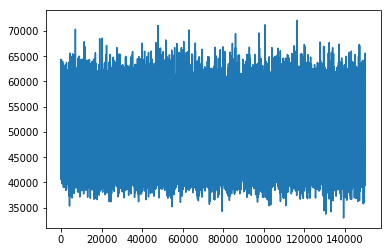

In [24]:
# errs = gbrbm.fit(red_data, n_epoches=300, batch_size=20)
# plt.plot(errs)
# plt.show()

In [62]:
rbm_hidden = gbrbm.transform(red_data)
val_hidden = gbrbm.transform(val_img)
test_hidden = gbrbm.transform(test_images)

In [63]:
input_shape=(9,)
num_classes = 10
model_rbm = keras.Sequential()
model_rbm.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_rbm.add(Dropout(0.2))
model_rbm.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_rbm.add(Dense(num_classes, activation='softmax'))

model_rbm.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
rbm_train=model_rbm.fit(rbm_hidden,tr_labels,batch_size=20,
          epochs=150,validation_data=(val_hidden,val_lab))

Train on 10000 samples, validate on 1000 samples
Epoch 1/150
10000/10000 [==============================] - 1s 132us/step - loss: 1.8860 - acc: 0.3488 - val_loss: 1.2647 - val_acc: 0.5530
Epoch 2/150
10000/10000 [==============================] - 1s 88us/step - loss: 1.1606 - acc: 0.6065 - val_loss: 1.0125 - val_acc: 0.6430
Epoch 3/150
10000/10000 [==============================] - 1s 88us/step - loss: 1.0642 - acc: 0.6407 - val_loss: 0.9430 - val_acc: 0.6790
Epoch 4/150
10000/10000 [==============================] - 1s 86us/step - loss: 1.0288 - acc: 0.6520 - val_loss: 0.9449 - val_acc: 0.6650
Epoch 5/150
10000/10000 [==============================] - 1s 87us/step - loss: 1.0061 - acc: 0.6616 - val_loss: 0.9143 - val_acc: 0.6720
Epoch 6/150
10000/10000 [==============================] - 1s 97us/step - loss: 0.9879 - acc: 0.6671 - val_loss: 0.8892 - val_acc: 0.6810
Epoch 7/150
10000/10000 [==============================] - 1s 86us/step - loss: 0.9620 - acc: 0.6695 - val_loss: 0.8674 - 

10000/10000 [==============================] - 1s 85us/step - loss: 0.7645 - acc: 0.7231 - val_loss: 0.7542 - val_acc: 0.7210
Epoch 60/150
10000/10000 [==============================] - 1s 84us/step - loss: 0.7619 - acc: 0.7220 - val_loss: 0.7537 - val_acc: 0.7330
Epoch 61/150
10000/10000 [==============================] - 1s 84us/step - loss: 0.7624 - acc: 0.7225 - val_loss: 0.7588 - val_acc: 0.7250
Epoch 62/150
10000/10000 [==============================] - 1s 83us/step - loss: 0.7627 - acc: 0.7210 - val_loss: 0.7547 - val_acc: 0.7280
Epoch 63/150
10000/10000 [==============================] - 1s 88us/step - loss: 0.7582 - acc: 0.7240 - val_loss: 0.7586 - val_acc: 0.7200
Epoch 64/150
10000/10000 [==============================] - 1s 84us/step - loss: 0.7583 - acc: 0.7235 - val_loss: 0.7486 - val_acc: 0.7340
Epoch 65/150
10000/10000 [==============================] - 1s 83us/step - loss: 0.7593 - acc: 0.7232 - val_loss: 0.7540 - val_acc: 0.7230
Epoch 66/150
10000/10000 [==============

Epoch 118/150
10000/10000 [==============================] - 1s 85us/step - loss: 0.7274 - acc: 0.7301 - val_loss: 0.7687 - val_acc: 0.7270
Epoch 119/150
10000/10000 [==============================] - 1s 84us/step - loss: 0.7283 - acc: 0.7315 - val_loss: 0.7662 - val_acc: 0.7220
Epoch 120/150
10000/10000 [==============================] - 1s 86us/step - loss: 0.7266 - acc: 0.7309 - val_loss: 0.7684 - val_acc: 0.7230
Epoch 121/150
10000/10000 [==============================] - 1s 83us/step - loss: 0.7282 - acc: 0.7299 - val_loss: 0.7851 - val_acc: 0.7240
Epoch 122/150
10000/10000 [==============================] - 1s 85us/step - loss: 0.7283 - acc: 0.7281 - val_loss: 0.7705 - val_acc: 0.7290
Epoch 123/150
10000/10000 [==============================] - 1s 88us/step - loss: 0.7297 - acc: 0.7306 - val_loss: 0.7694 - val_acc: 0.7280
Epoch 124/150
10000/10000 [==============================] - 1s 86us/step - loss: 0.7298 - acc: 0.7272 - val_loss: 0.7774 - val_acc: 0.7240
Epoch 125/150
10000/

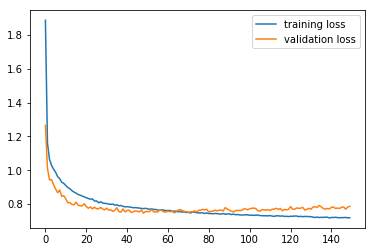

In [64]:
plt.plot(rbm_train.history['loss'],label="training loss")
plt.plot(rbm_train.history['val_loss'],label="validation loss")
plt.legend()
plt.show()

In [65]:
loss,acc = model_rbm.evaluate(test_hidden,test_labels)
print(acc)

10000/10000 [==============================] - 0s 22us/step
0.7273


### auto encoder 3_part_d

In [66]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# this is the size of our encoded representations
encoding_dim = 9

# input_img = Input(shape=(25,))
h1 = Dense(128, activation='relu',input_shape=(25,))
h2 = Dense(encoding_dim, activation='relu',input_shape=(128,))

h3 = Dense(128,activation="relu",input_shape=(9,))
h4 = Dense(25, activation='sigmoid',input_shape=(128,))
autoencoder = keras.Sequential([h1,h2,h3,h4])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 1161      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_27 (Dense)             (None, 25)                3225      
Total params: 8,994
Trainable params: 8,994
Non-trainable params: 0
_________________________________________________________________


In [67]:
##encoder model
encoder = keras.Sequential([h1,h2])
print(encoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 1161      
Total params: 4,489
Trainable params: 4,489
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
#decoder model
decoder = keras.Sequential([h3,h4])
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_27 (Dense)             (None, 25)                3225      
Total params: 4,505
Trainable params: 4,505
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
autoencoder.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
            )

In [72]:
ae_train = autoencoder.fit(red_data, red_data,
                epochs=50,
                batch_size=128,
                shuffle=True)

Epoch 1/50
10000/10000 [==============================] - 1s 62us/step - loss: 94416.5776
Epoch 2/50
10000/10000 [==============================] - 0s 10us/step - loss: 94414.8831
Epoch 3/50
10000/10000 [==============================] - 0s 10us/step - loss: 94412.6864
Epoch 4/50
10000/10000 [==============================] - 0s 11us/step - loss: 94410.1299
Epoch 5/50
10000/10000 [==============================] - 0s 10us/step - loss: 94407.2832
Epoch 6/50
10000/10000 [==============================] - 0s 10us/step - loss: 94406.6321
Epoch 7/50
10000/10000 [==============================] - 0s 12us/step - loss: 94405.4187
Epoch 8/50
10000/10000 [==============================] - 0s 10us/step - loss: 94405.1622
Epoch 9/50
10000/10000 [==============================] - 0s 10us/step - loss: 94403.3155
Epoch 10/50
10000/10000 [==============================] - 0s 11us/step - loss: 94403.5363
Epoch 11/50
10000/10000 [==============================] - 0s 12us/step - loss: 94401.6731
Epoch 12

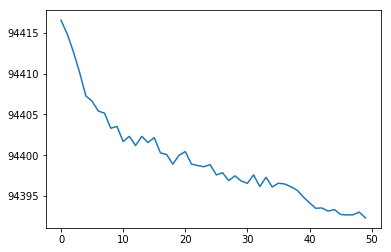

In [73]:
plt.plot(ae_train.history['loss'])

In [74]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_27 (Dense)             (None, 25)                3225      
Total params: 4,505
Trainable params: 4,505
Non-trainable params: 0
_________________________________________________________________


In [75]:
encoded_data = encoder.predict(red_data)
val_encoded = encoder.predict(val_img)
test_encoded = encoder.predict(test_images)

In [76]:
### now training the dnn
input_shape=(9,)
num_classes = 10
model_encoder = keras.Sequential()
model_encoder.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_encoder.add(Dropout(0.2))
model_encoder.add(Dense(256, activation="sigmoid",input_shape=input_shape))
model_encoder.add(Dense(num_classes, activation='softmax'))

model_encoder.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
encoder_hidden_train=model_encoder.fit(encoded_data,tr_labels,batch_size=20,
          epochs=75,validation_data=(val_encoded,val_lab))

Train on 10000 samples, validate on 1000 samples
Epoch 1/75
10000/10000 [==============================] - 1s 139us/step - loss: 0.9448 - acc: 0.6995 - val_loss: 0.6590 - val_acc: 0.7840
Epoch 2/75
10000/10000 [==============================] - 1s 86us/step - loss: 0.6797 - acc: 0.7716 - val_loss: 0.5584 - val_acc: 0.8120
Epoch 3/75
10000/10000 [==============================] - 1s 87us/step - loss: 0.6476 - acc: 0.7813 - val_loss: 0.5559 - val_acc: 0.8130
Epoch 4/75
10000/10000 [==============================] - 1s 90us/step - loss: 0.6329 - acc: 0.7825 - val_loss: 0.5348 - val_acc: 0.8170
Epoch 5/75
10000/10000 [==============================] - 1s 96us/step - loss: 0.6201 - acc: 0.7928 - val_loss: 0.5408 - val_acc: 0.8110
Epoch 6/75
10000/10000 [==============================] - 1s 91us/step - loss: 0.6123 - acc: 0.7930 - val_loss: 0.5336 - val_acc: 0.8170
Epoch 7/75
10000/10000 [==============================] - 1s 86us/step - loss: 0.5856 - acc: 0.8037 - val_loss: 0.5084 - val_acc

10000/10000 [==============================] - 1s 84us/step - loss: 0.3887 - acc: 0.8605 - val_loss: 0.4230 - val_acc: 0.8590
Epoch 61/75
10000/10000 [==============================] - 1s 88us/step - loss: 0.3826 - acc: 0.8610 - val_loss: 0.4150 - val_acc: 0.8570
Epoch 62/75
10000/10000 [==============================] - 1s 86us/step - loss: 0.3872 - acc: 0.8601 - val_loss: 0.4080 - val_acc: 0.8520
Epoch 63/75
10000/10000 [==============================] - 1s 83us/step - loss: 0.3803 - acc: 0.8644 - val_loss: 0.4059 - val_acc: 0.8640
Epoch 64/75
10000/10000 [==============================] - 1s 82us/step - loss: 0.3775 - acc: 0.8659 - val_loss: 0.4188 - val_acc: 0.8530
Epoch 65/75
10000/10000 [==============================] - 1s 82us/step - loss: 0.3780 - acc: 0.8661 - val_loss: 0.4148 - val_acc: 0.8610
Epoch 66/75
10000/10000 [==============================] - 1s 82us/step - loss: 0.3889 - acc: 0.8593 - val_loss: 0.4091 - val_acc: 0.8690
Epoch 67/75
10000/10000 [=====================

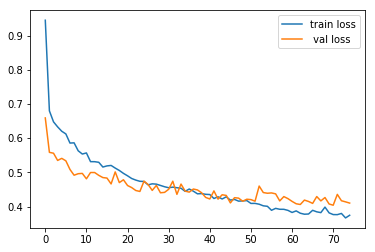

In [77]:
plt.plot(encoder_hidden_train.history['loss'],label ="train loss")
plt.plot(encoder_hidden_train.history['val_loss'],label =" val loss")
plt.legend()
plt.show()

In [78]:
loss,acc = model_encoder.evaluate(test_encoded,test_labels)
print(acc)

10000/10000 [==============================] - 0s 21us/step
0.8617
